<a href="https://colab.research.google.com/github/annasli378/features_AK/blob/main/features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

read files


In [3]:
path_to_data = '/content/drive/MyDrive/USG/analiza_AK/kolejnosc5/cechy_episleb_smote_norm_CHI2.csv'
data = pd.read_csv(path_to_data)
path_to_Y = '/content/drive/MyDrive/USG/analiza_AK/kolejnosc/Ynew.csv'
Y = pd.read_csv(path_to_Y)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 482 entries, MEPGSleb_sub to q3SEpi
dtypes: float64(482)
memory usage: 1.0 MB


In [26]:
dataY=pd.concat([Y, data], axis=1, join="inner")
dataY.head()

,1,MEPGSleb_sub,MEPVSleb_sub,LBP8B8Epi,q1BSleb_sub,q1GSleb_sub,q1VSleb_sub,VGlcm24CorrEpisleb,VGlcm22CorrEpisleb,medianDepthEpi,...,LBP4S4Episleb,LBP4V4Episleb,LBP2G4Episleb,BGlcm321HomoSleb,LBP8G4Episleb,LBP2H4Episleb,VGlcm44ContrEpisleb,GGlcm16161HomoEpisleb,BGlcm164HomoSleb,q3SEpi
0,1,-0.654577,-0.684208,3.564079,-2.407496,-2.330119,-2.330119,-5.989401,-5.948455,0.937252,...,8.515517,8.515517,6.629578,-3.267722,4.176013,7.055171,-0.989806,3.662369,-3.240421,0.115534
1,1,-0.654577,-0.684208,-0.261025,-2.407496,-2.330119,-2.330119,-5.357399,-3.927795,0.512394,...,1.513372,1.513372,0.929585,-3.267722,-0.059132,0.836534,-0.202922,1.450923,-3.240421,0.115534
2,1,0.069943,0.026464,0.351591,1.615572,2.048765,2.048765,0.542576,0.519146,0.512394,...,1.646785,1.646785,1.459167,-0.883616,1.501435,1.169096,-0.243717,0.985787,-1.526967,0.115534
3,1,0.642200,0.559517,-0.500764,1.615572,1.172988,1.172988,-0.032022,-0.083930,-0.762178,...,-0.020312,-0.020312,0.382734,0.358381,-0.373625,0.214304,0.087852,-0.188974,0.382262,0.115534
4,1,-0.654577,-0.684208,-0.500764,-1.736985,-1.892231,-1.892231,-0.498320,0.071657,-1.611893,...,-0.417227,-0.417227,-0.455311,0.855502,-0.297837,-0.505615,0.914453,-0.271177,0.831383,0.115534


In [27]:
data_top10 = dataY.iloc[:,:20]
data_top10.head()

,1,MEPGSleb_sub,MEPVSleb_sub,LBP8B8Epi,q1BSleb_sub,q1GSleb_sub,q1VSleb_sub,VGlcm24CorrEpisleb,VGlcm22CorrEpisleb,medianDepthEpi,LBP8R8Epi,LBP8H8Epi,medianVSleb_sub,medianGSleb_sub,SGlcm43ContrEpi,entropyBEpi,medianBSleb_sub,LBP8R8Episleb,GGlcm42EnerSleb,VGlcm42EnerSleb
0,1,-0.654577,-0.684208,3.564079,-2.407496,-2.330119,-2.330119,-5.989401,-5.948455,0.937252,5.847492,6.266397,-2.405679,-2.402030,0.039302,1.123004,-2.465937,12.511167,-1.009839,-1.009424
1,1,-0.654577,-0.684208,-0.261025,-2.407496,-2.330119,-2.330119,-5.357399,-3.927795,0.512394,-0.123194,-0.372468,-2.405679,-2.402030,0.063652,0.387462,-2.465937,0.174986,-1.009839,-1.009424
2,1,0.069943,0.026464,0.351591,1.615572,2.048765,2.048765,0.542576,0.519146,0.512394,0.094822,1.748165,1.810443,1.813106,0.668431,0.086942,1.391678,0.045958,-0.669531,-0.669157
3,1,0.642200,0.559517,-0.500764,1.615572,1.172988,1.172988,-0.032022,-0.083930,-0.762178,-0.379376,-0.743860,1.509292,1.512025,-0.396114,-1.479182,1.391678,-0.354320,0.248303,0.248567
4,1,-0.654577,-0.684208,-0.500764,-1.736985,-1.892231,-1.892231,-0.498320,0.071657,-1.611893,-0.379376,-0.756438,-1.803376,-1.799868,-0.248427,-1.856446,-1.983735,-0.354320,0.467554,0.467786


In [70]:
corr_matrix = dataY.corr()['1']
corr_matrix=corr_matrix.sort_values()

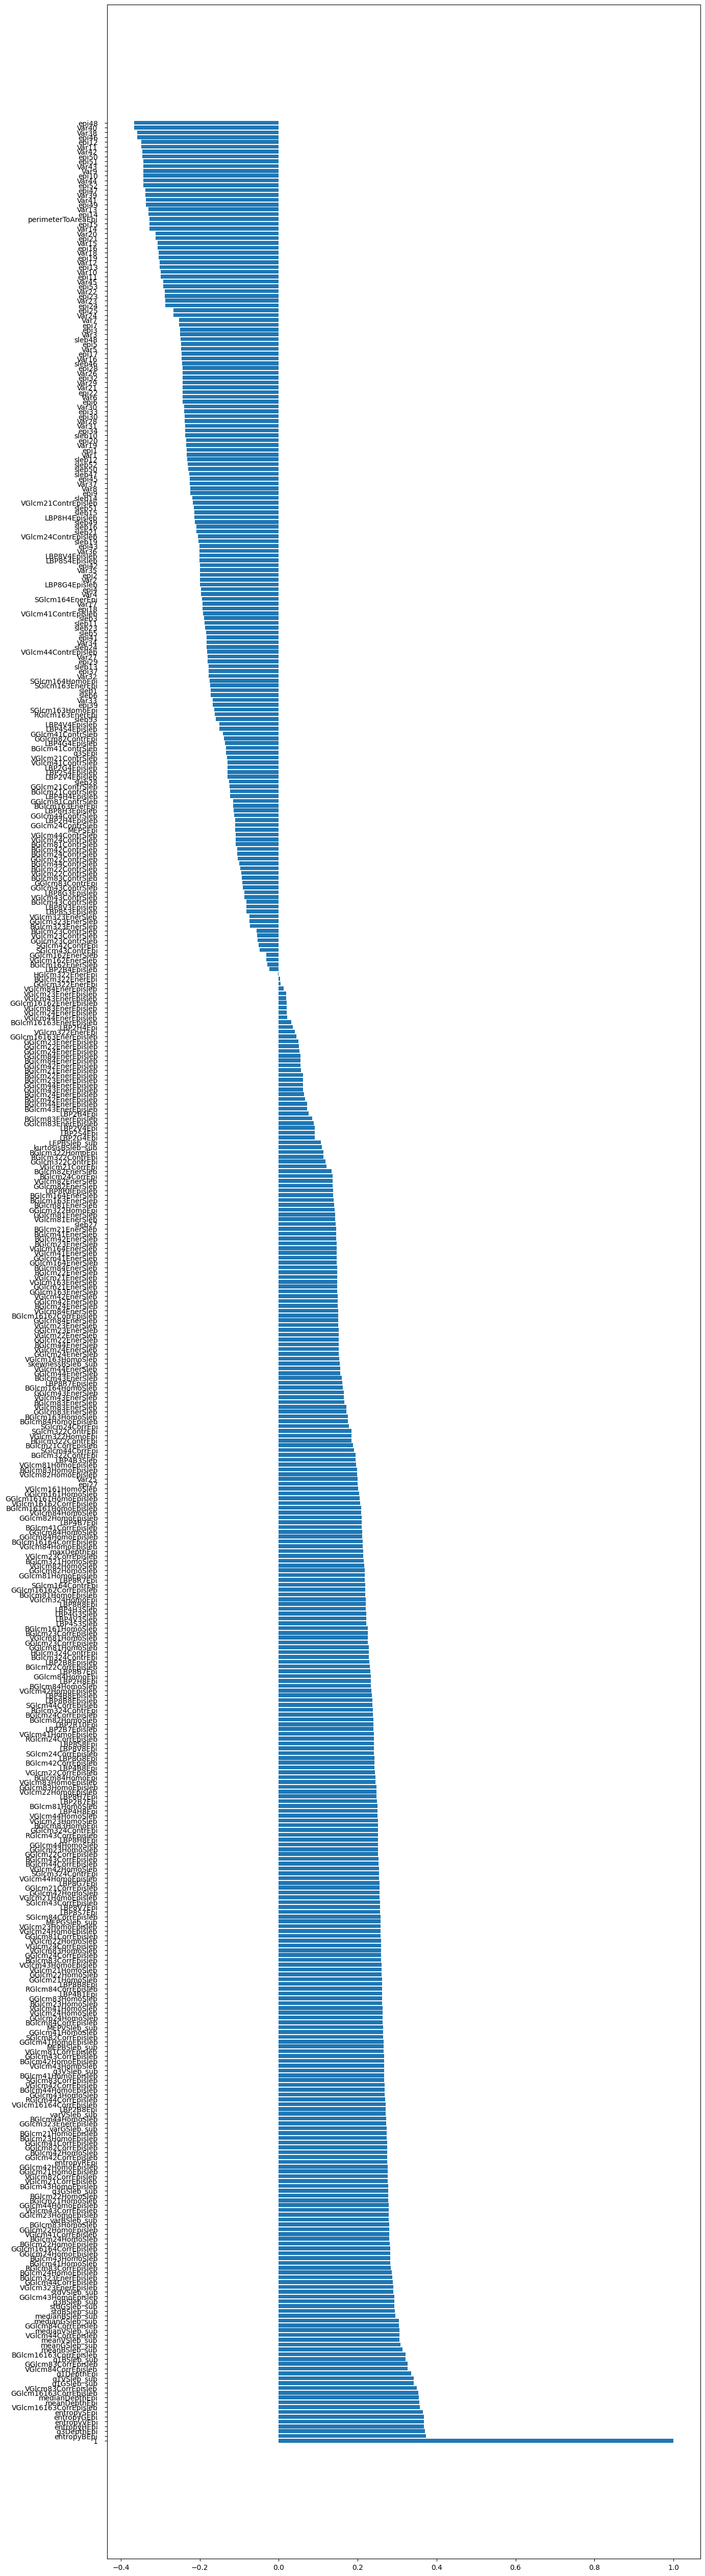

In [73]:
fig, ax = plt.subplots(figsize =(15, 65))

ax.barh(list(corr_matrix.keys()), list(corr_matrix[list(corr_matrix.keys())]) )
ax.invert_yaxis()

# Add padding between axes and labels
ax.yaxis.set_tick_params(pad = 10)
plt.show()